In [1]:
"Wine Quality Prediction."

'Wine Quality Prediction.'

In [52]:
# Importing required packages.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
# loading dataset
wine = pd.read_csv('./winequality-red.csv')

In [4]:
# checking how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
"Analysing the data."

'Analysing the data.'

<Axes: xlabel='quality', ylabel='fixed acidity'>

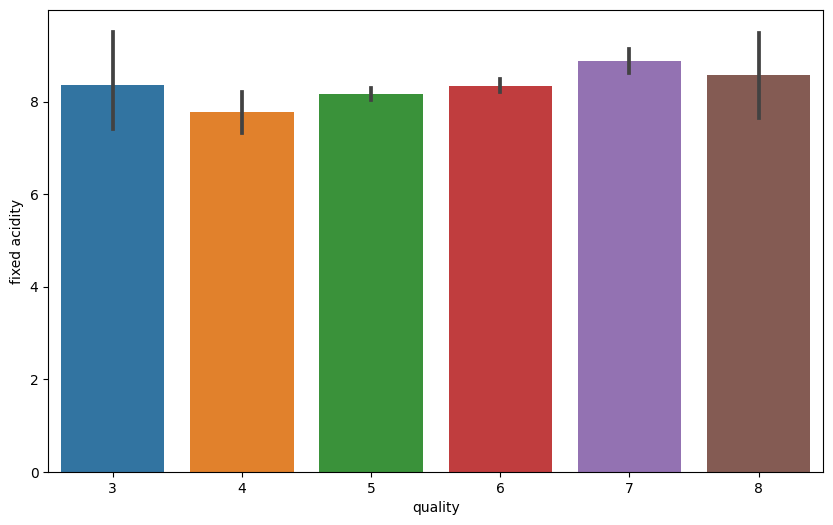

In [7]:
# fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

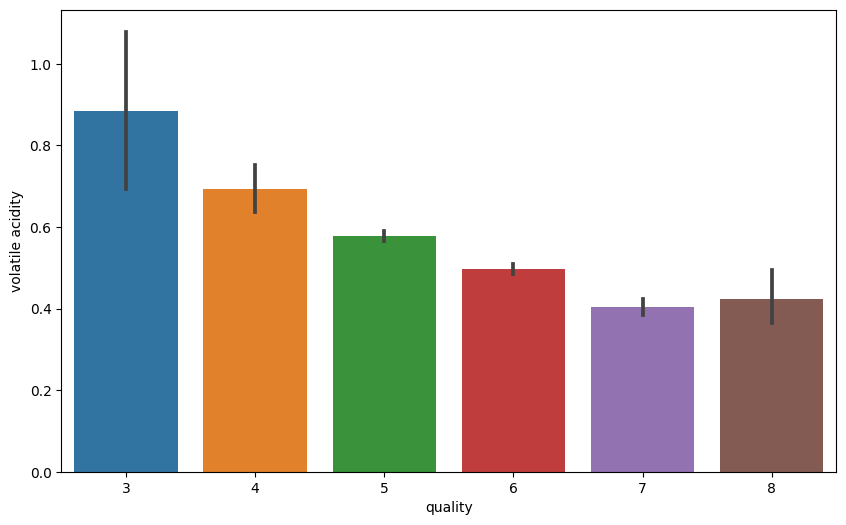

In [8]:
# its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

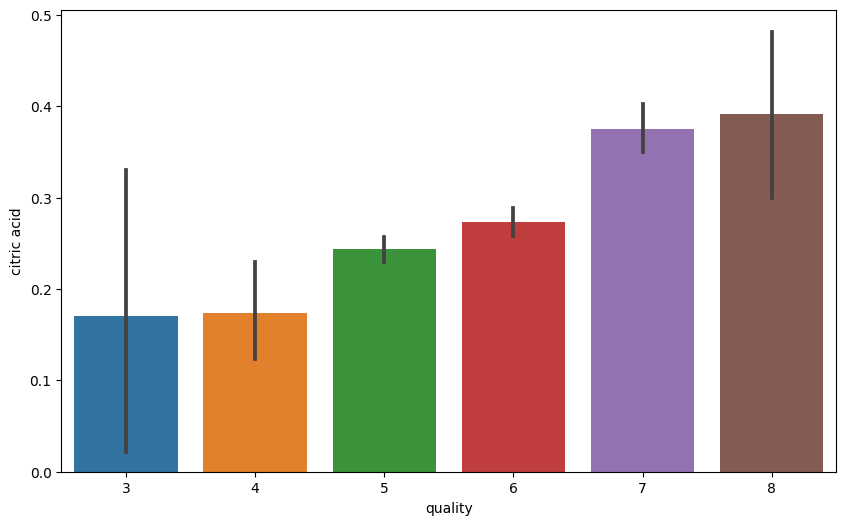

In [9]:
# composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

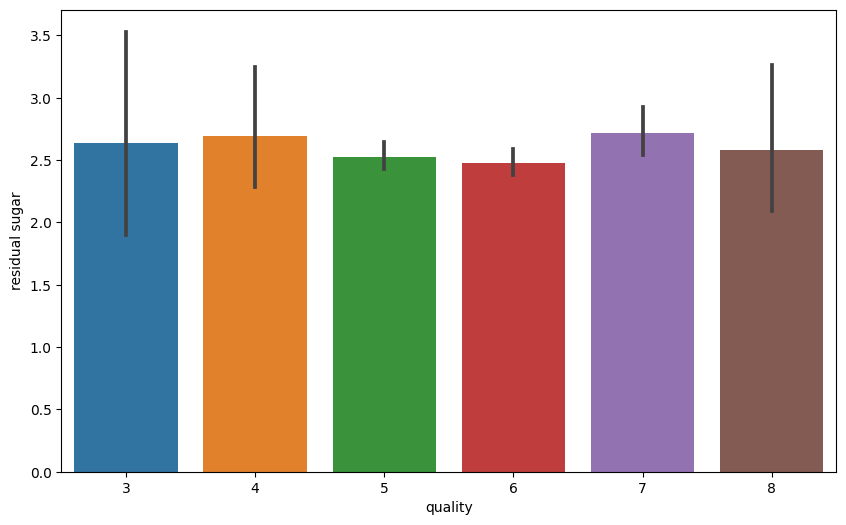

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

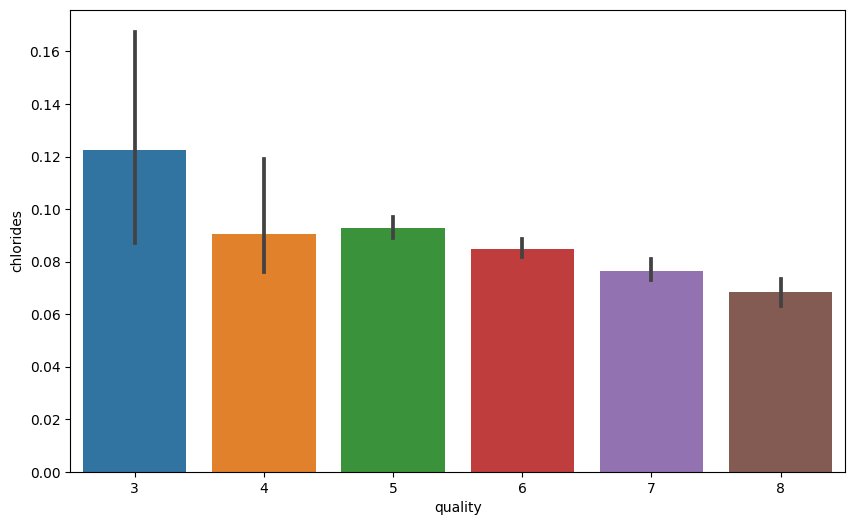

In [11]:
# composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

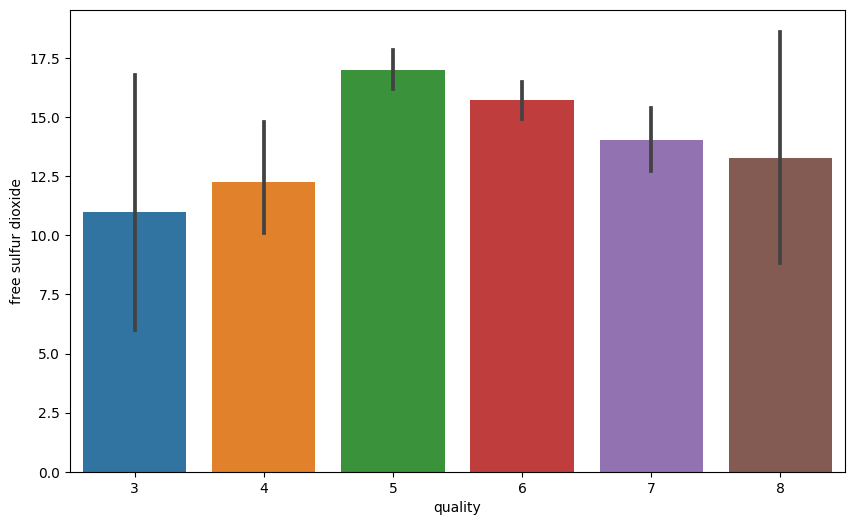

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

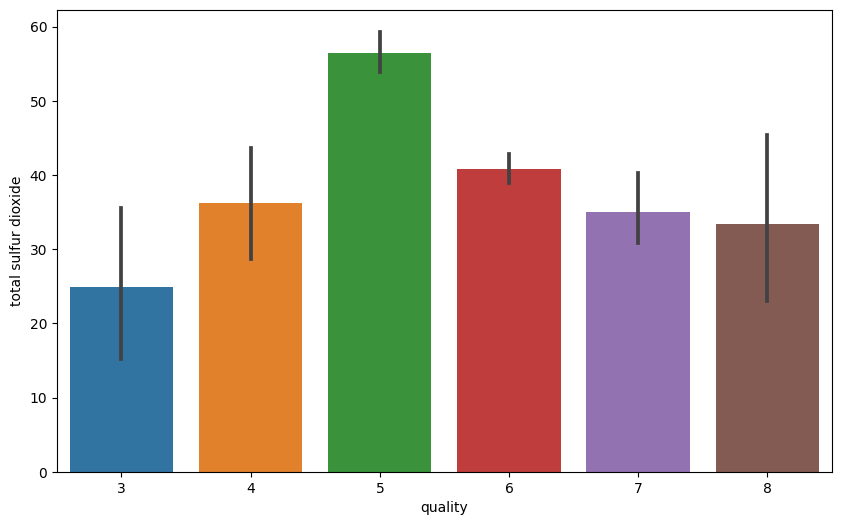

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

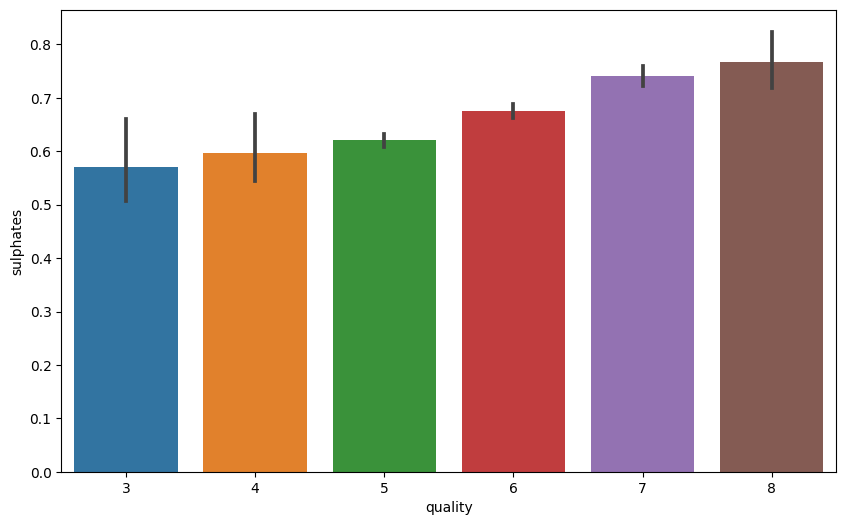

In [14]:
# sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

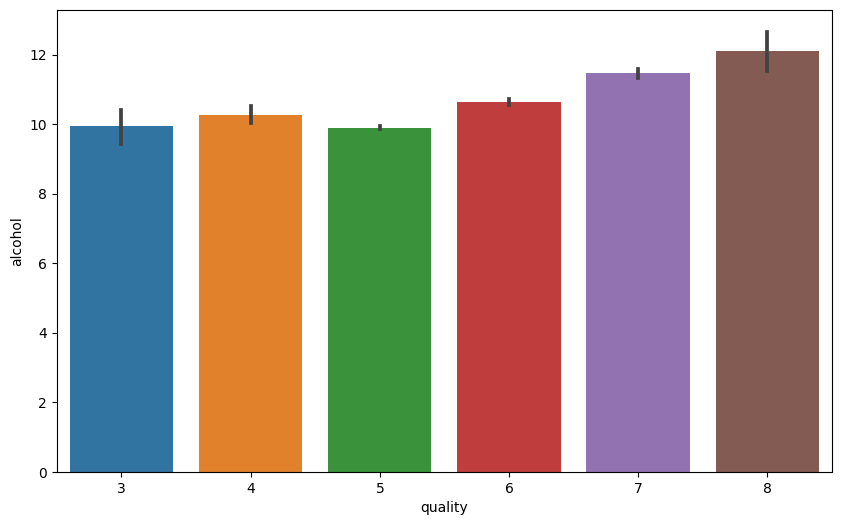

In [15]:
# alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [16]:
# making binary classificaion for the response variable. Dividing wine as good and bad by giving the limit for the quality.
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [17]:
# assigning labels to our quality variable
label_quality = LabelEncoder()

In [18]:
# Bad - 0
# Good - 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [19]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: ylabel='count'>

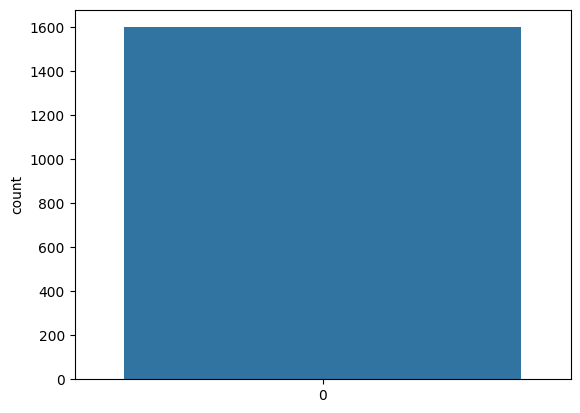

In [20]:
sns.countplot(wine['quality'])

In [21]:
# seperating the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [22]:
# Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# applying Standard scaling to get optimized result
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
"Random Forest Classifier"

'Random Forest Classifier'

In [26]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [27]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



In [34]:
"Accuracy of Random Forest Classifier - 87%"

'Accuracy of Random Forest Classifier - 87%'

In [29]:
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 30  17]]


In [30]:
"Stochastic Gradient Decent Classifier"

'Stochastic Gradient Decent Classifier'

In [32]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [33]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       273
           1       0.45      0.45      0.45        47

    accuracy                           0.84       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.84      0.84      0.84       320



In [35]:
"Accuracy of Stochastic Gradient Descent Classifier - 84%"

'Accuracy of Stochastic Gradient Descent Classifier - 84%'

In [36]:
print(confusion_matrix(y_test, pred_sgd))

[[247  26]
 [ 26  21]]


In [37]:
"Support Vector Classifier"

'Support Vector Classifier'

In [38]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [40]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [41]:
"Accuracy of Support Vector Classifier - 86%"

'Accuracy of Support Vector Classifier - 86%'

In [59]:
predictions = [["Random Forest", "87%"], 
               ["Stochastic GD", "84%"], 
               ["Support Vector", "86%"]]


In [60]:
pd.DataFrame(predictions, columns=["Classifiers", "Accuracy"])

,Classifiers,Accuracy
0,Random Forest,87%
1,Stochastic GD,84%
2,Support Vector,86%
